<div align="center">

# MEGR7172/8172

### Computational Methods (Fall 2025)
### Duke 227, Tu/Th 08:30 - 09:45 pm

</div>


# 15. Error and Accuracy
In this lecture, we will continue to explore the finite difference (FD) approach applied to solve the PDE of the 1D equation. In particular, we will focus on the error analysis.

## 15.1 Impact of $r$ in the FD method

When solving the heat equation, we essentialy used the following update rule

$$
u_i^{n+1} = u_i^n + \frac{\partial u_i^n}{\partial t} \Delta t.
$$

Equivalently, we used numerical 
$$
\frac{\partial u_i^n}{\partial t} = \alpha \frac{\partial^2 u_i^n}{\partial x^2} 
$$ 
according to the PDE.


Hence, we arrive at the following update rule, known as the **Forward‑Time Centered‑Space** (FTCS) scheme:

$$
u_i^{n+1} \;=\; u_i^n \;+\; \alpha\,\frac{\Delta t}{\Delta x^2}\,(u_{i+1}^n - 2u_i^n + u_{i-1}^n).
$$

Introducing the dimensionless parameter \(r=\alpha\,\Delta t/\Delta x^2\) gives the compact form

$$
u_i^{n+1} = u_i^n + r\,(u_{i+1}^n - 2u_i^n + u_{i-1}^n).
$$

Notes:
- The scheme is explicit (computes u at n+1 from known values at n).
- Accuracy: first order in time (O(Δt)) and second order in space (O(Δx^2)).
- Stability is conditional; FTCS requires \(r \leq 1/2\) for stability.

We also defined 
$$
r = \alpha \Delta t / \Delta x^2
$$

to make

$$
u_i^{n+1} = u_i^n + r (u_{i+1}^n − 2 u_i^n + u_{i-1}^n).
$$

In this formula, $r$ is set to control the precision between $\Delta t$ and $\Delta x^2$.

Now let's vary the choice of $r$ to check how it impacts the results.


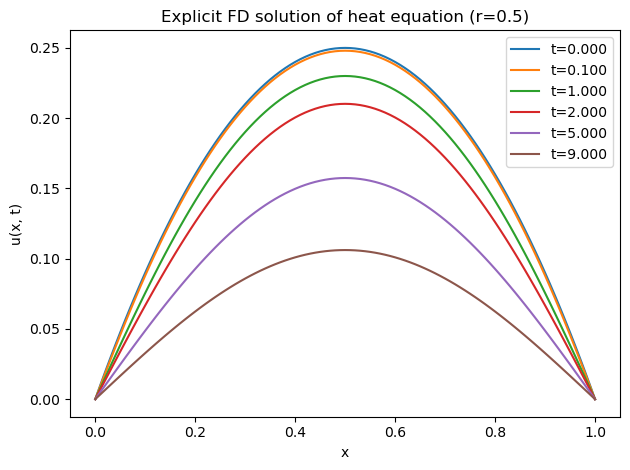

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# Parameters
L = 1.0
alpha = 0.01
t_max = 10.0
Nx = 100
r = 0.5  # stability parameter

# Grid and time step
dx = L / Nx
dt = r * dx * dx / alpha     # safe choice: r = 0.4 <= 0.5
Nt = int(t_max / dt)           # run until t_final ~ 1.0 (adjust as needed)

# grid and initial condition
x = np.linspace(0, L, Nx + 1)
u = x * (1 - x)              # u(0)=u(L)=0 by construction

# times to capture (must be <= t_final)
times_plot = [0.0, 0.1, 1.0, 2.0, 5.0, 9.0]
idx_list = [int(round(t / dt)) for t in times_plot]

# store snapshots
snapshots = {}
snapshots[0] = u.copy()

# time stepping
for n in range(Nt):
    u_new = u.copy()
    u_new[1:-1] = u[1:-1] + r * (u[2:] - 2 * u[1:-1] + u[:-2])
    u_new[0] = 0.0
    u_new[-1] = 0.0
    u = u_new
    if (n + 1) in idx_list:
        snapshots[n + 1] = u.copy()

# plot snapshots
for t, idx in zip(times_plot, idx_list):
    plt.plot(x, snapshots[idx], label=f"t={t:.3f}")
plt.xlabel("x")
plt.ylabel("u(x, t)")
plt.title(f"Explicit FD solution of heat equation (r={r})")
plt.legend()
plt.tight_layout()
plt.show()



## 15.2 Physical interpretation of $r$

The parameter $r = \frac{\alpha \Delta t}{(\Delta x)^2}$ is a **dimensionless stability parameter** that measures the ratio of the numerical time step to the **diffusive time scale**. 

To understand stability, we perform a **von Neumann stability analysis**. Any solution can be decomposed into Fourier modes of the form:
$$u(x,t) = \sum_k \hat{u}_k(t) e^{ikx}$$

For each mode, we assume a solution of the form $\hat{u}_k^n = G^n \hat{u}_k^0$, where $G$ is the **amplification factor**.

Substituting the FTCS update formula:
$$u_j^{n+1} = u_j^n + r(u_{j+1}^n - 2u_j^n + u_{j-1}^n)$$

For a Fourier mode $u_j^n = G^n e^{ikj\Delta x}$, we get:
$$G e^{ikj\Delta x} = e^{ikj\Delta x} + r(e^{ik(j+1)\Delta x} - 2e^{ikj\Delta x} + e^{ik(j-1)\Delta x})$$

Factoring out $e^{ikj\Delta x}$ and using $e^{ik\Delta x} + e^{-ik\Delta x} = 2\cos(k\Delta x)$:
$$G = 1 + r(e^{ik\Delta x} + e^{-ik\Delta x} - 2) = 1 + 2r(\cos(k\Delta x) - 1)$$

Using the identity $\cos(\theta) - 1 = -2\sin^2(\theta/2)$:
$$G = 1 - 4r\sin^2\left(\frac{k\Delta x}{2}\right)$$

**Stability Analysis:**

For numerical stability, we require $|G| \leq 1$ for all wavenumbers $k$.

Since $0 \leq \sin^2\left(\frac{k\Delta x}{2}\right) \leq 1$:
- **Best case** ($\sin^2 = 0$): $G = 1$ (low-frequency modes are perfectly preserved)
- **Worst case** ($\sin^2 = 1$): $G = 1 - 4r$ (high-frequency modes are most affected)

For stability in the worst case:
$$|1 - 4r| \leq 1$$
$$-1 \leq 1 - 4r \leq 1$$
$$-2 \leq -4r \leq 0$$
$$0 \leq r \leq \frac{1}{2}$$

## 15.3 Practical Considerations

1. **Instability** for $r > 0.5$ (due to the use of high frequncy modes).

2. **Accuracy considerations:**
- FTCS has truncation error: $O(\Delta t)$ in time, $O((\Delta x)^2)$ in space
- To achieve a balanced, choose $\Delta t \propto (\Delta x)^2$ (constant $r$).
- Given the constraints on $r$, you cannot choose very big $\Delta t$

3. **Computational efficiency:**
- Smaller $r$ requires more time steps to reach final time
- Trade-off between stability and computational cost

**Recommendations:**
- **Safe choice:** $r \approx 0.4$ (provides stability margin)
- **Time step selection:** $\Delta t = \frac{r (\Delta x)^2}{\alpha}$